## Plotting decision region

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X , y , classifier ,test_idx = None , resolution = 0.02):
    #setup marker generator and colormap
    markers = ('s' , 'x' , 'o' , '^' , 'v')
    colors = ('red' , 'blue' , 'lightgreen' , 'gray' , 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot decision surfaces
    x1_min , x1_max = X[: , 0].min() - 1 , X[: , 0].max() + 1
    x2_min , x2_max = X[: , 1].min() - 1 , X[: , 1].max() + 1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , resolution) , 
                            np.arange(x2_min , x2_max , resolution))
    z = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1 , xx2 , z , alpha = 0.3 , cmap = cmap)
    plt.xlim(xx1.min() , xx1.max())
    plt.ylim(xx2.min() , xx2.max())
    
    for idx , cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl , 0] , y = X[y == cl , 1],
                    alpha = 0.8 , c = colors[idx] , 
                    marker = markers[idx] , label = cl , edgecolor = 'black')
    
    #highlight test sample
    if test_idx:
        #plot all samples
        X_test , y_test = X[test_idx , :] , y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],                    
                c='', edgecolor='black', alpha=1.0,                    \
                linewidth=1, marker='o',                    
                s=100, label='test set')
    

## Importing and splitting the dataset

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[: , (2 , 3)]
y = iris.target
print ('Class label:' , np.unique(y))

Class label: [0 1 2]


In [3]:
#splitting in test and train sets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 1 , stratify = y)

## Scaling

In [4]:
#feature scaling for standardization using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
X_combined_std = np.vstack((X_train_std , X_test_std))
y_combined = np.hstack((y_train , y_test))

## Support Vector Machines

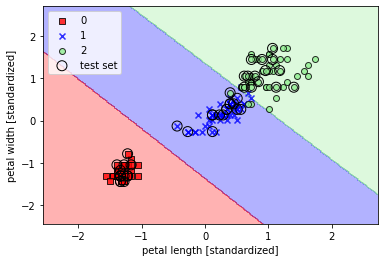

In [6]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150)) 
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()